In [1]:
import numpy as np
import matplotlib.pyplot as plt

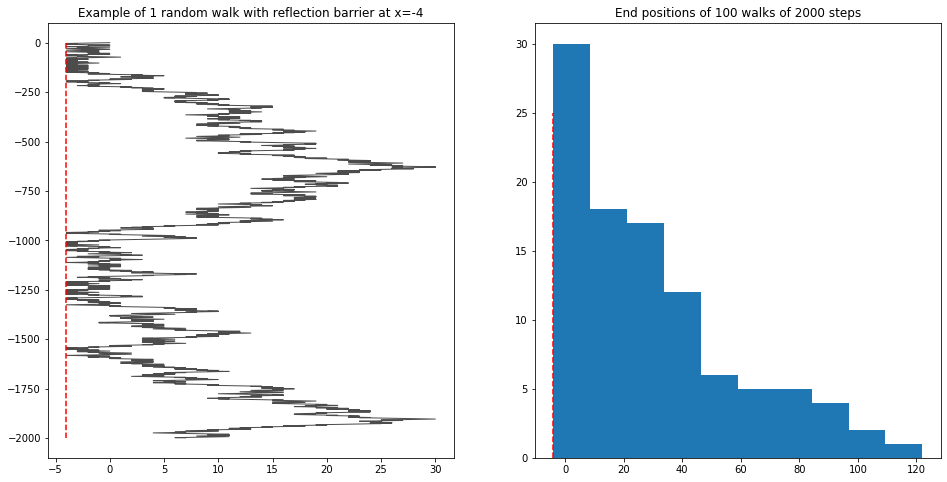

In [25]:
def single_walk1(n=2000, track_trace = False):
    trace = []
    position=0
    for i in range(n):
        if track_trace: trace.append(position)
        if position > -4:
            position+= 1-2*int(np.random.random()<0.5)
        else:
            position = -3
    return position, trace

end_positions = []
for i in range(100):
    if i == 0:
        position, trace_sample = single_walk1(track_trace=True)
        end_positions.append(position)
    else:
        end_positions.append(single_walk1()[0])
        
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Example of 1 random walk with reflection barrier at x=-4')
plt.plot(trace_sample,list(range(0,-len(trace_sample),-1)),color = 'black',linewidth=1, alpha=0.7)
plt.plot([-4,-4],[0,-2000],color = 'red',linestyle = '--')

plt.subplot(1,2,2)
plt.title('End positions of 100 walks of 2000 steps')
plt.hist(end_positions,bins=10)
plt.plot([-4,-4],[0,25],color='red',linestyle = '--')
plt.show()

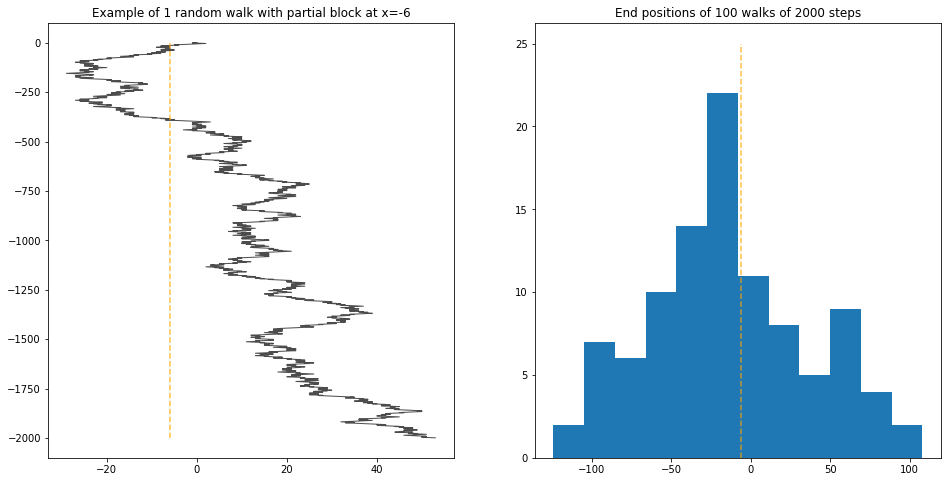

In [35]:
def single_walk2(n=2000, track_trace = False):
    trace = []
    position=0
    for i in range(n):
        if track_trace: trace.append(position)
        if position != -6:
            position+= 1-2*int(np.random.random()<0.5)
        else:
            position+= 1-2*int(np.random.random()<0.75)
    return position, trace

end_positions = []
for i in range(100):
    if i == 0:
        position, trace_sample = single_walk2(track_trace=True)
        end_positions.append(position)
    else:
        end_positions.append(single_walk2()[0])
        
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Example of 1 random walk with partial block at x=-6')
plt.plot(trace_sample,list(range(0,-len(trace_sample),-1)),color = 'black',linewidth=1, alpha=0.7)
plt.plot([-6,-6],[0,-2000],color = 'orange',linestyle = '--',alpha=0.7)

plt.subplot(1,2,2)
plt.title('End positions of 100 walks of 2000 steps')
plt.hist(end_positions,bins=12)
plt.plot([-6,-6],[0,25],color='orange',linestyle = '--',alpha=0.7)
plt.show()

In [58]:
import math
def single_plane_walk(n=1000,variance=1,track_trace=False):
    tracex=[]
    tracey=[]
    position = (0,0)
    for i in range(n):
        if track_trace: 
            tracex.append(position[0])
            tracey.append(position[1])
        direction = np.random.uniform(0,360) 
        theta = math.radians(direction)
        step_size = np.random.normal(0,variance**(1/2))
        position = (step_size*math.cos(theta),step_size*math.sin(theta))
    return position, tracex, tracey

In [64]:
def generate_results(N,var):
    end_positionsx = []
    end_positionsy = []
    for i in range(200):
        if i == 0:
            position, tracex, tracey = single_plane_walk(n=N, variance = var, track_trace=True)
            end_positionsx.append(position[0])
            end_positionsy.append(position[1])
        else:
            position, _, _ = single_plane_walk(n=1600,variance=0.5)
            end_positionsx.append(position[0])
            end_positionsy.append(position[1])

    plt.figure(figsize=(16,8))

    plt.subplot(1,2,1)
    plt.title('Example of 1 random walk')
    plt.plot(tracex,tracey,color = 'black',linewidth=1, alpha=0.7)

    plt.subplot(1,2,2)
    plt.title('End positions of 200 walks of {} steps, variance of step size = {}'.format(N,var))
    plt.scatter(end_positionsx,end_positionsy,color='orange',linestyle = '--',alpha=0.7)
    plt.show()

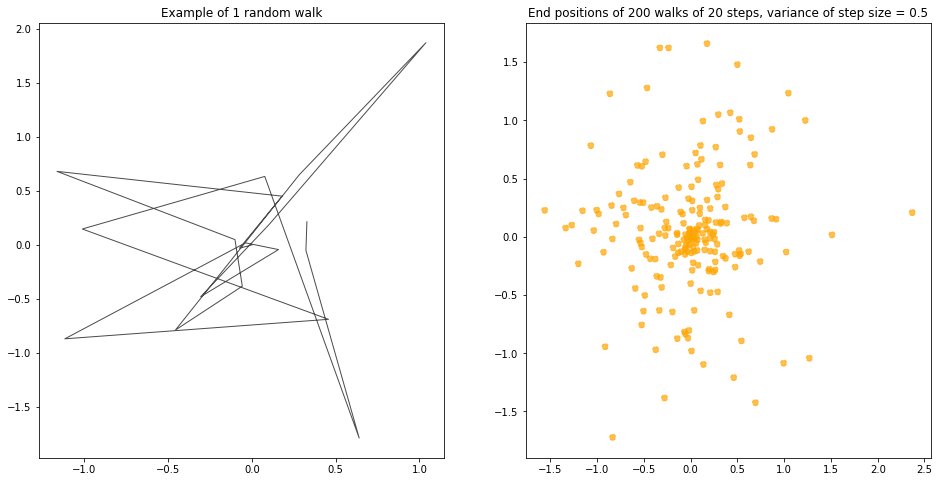

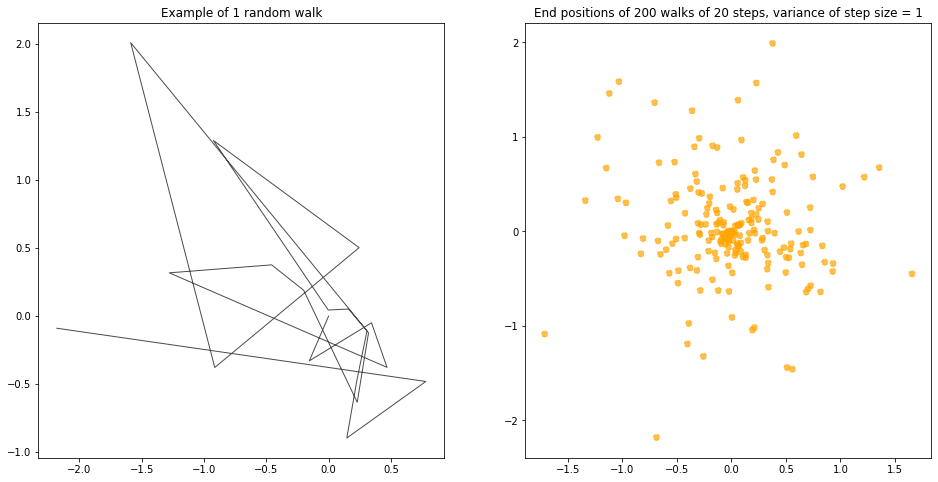

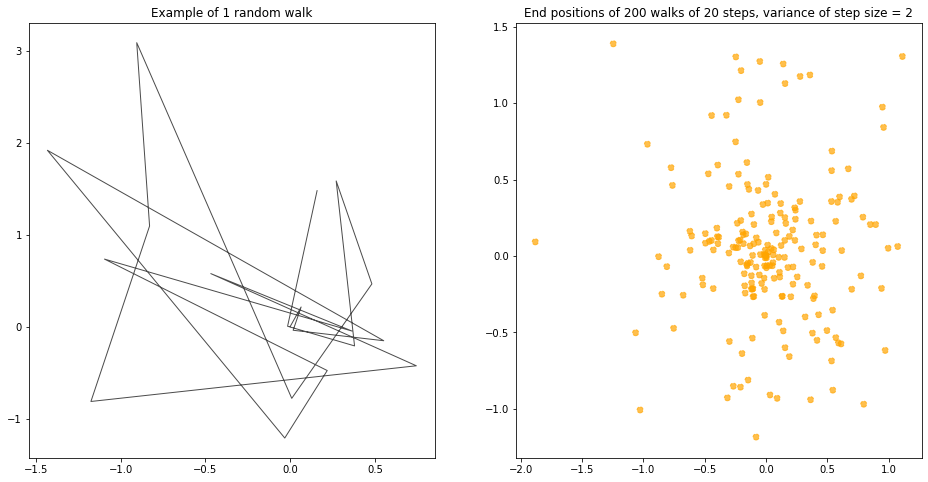

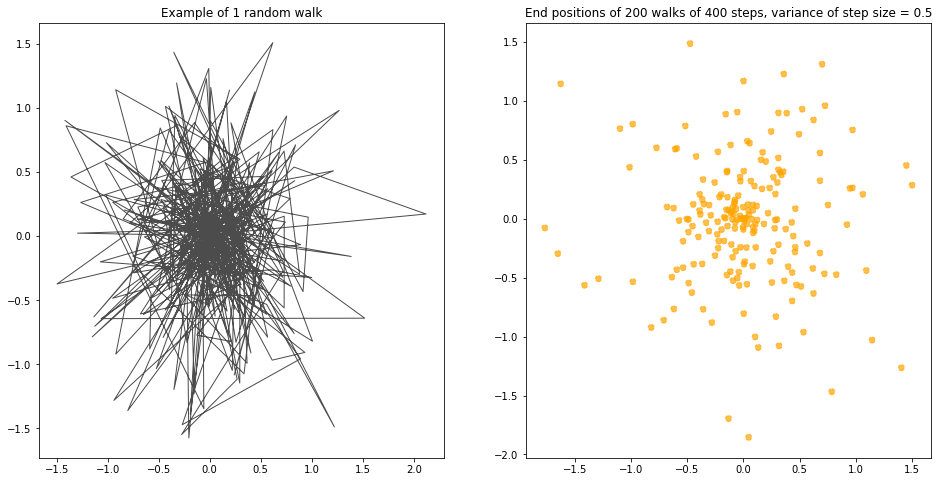

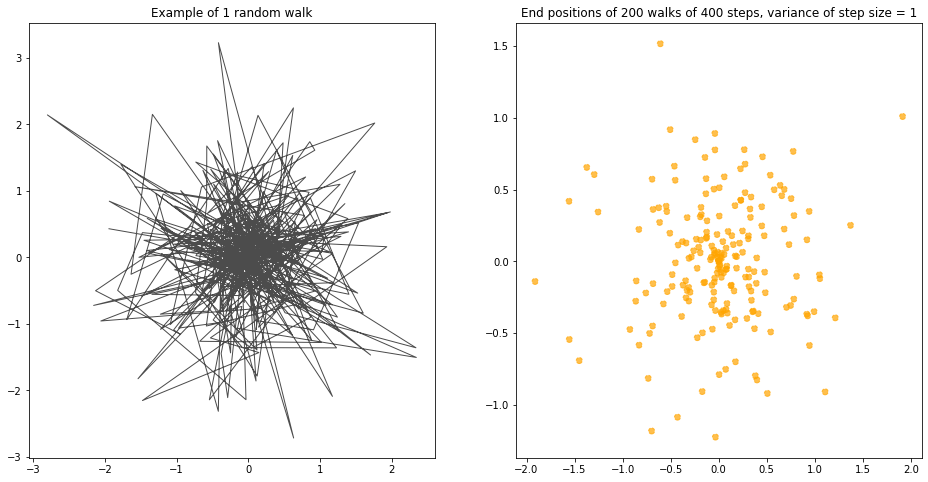

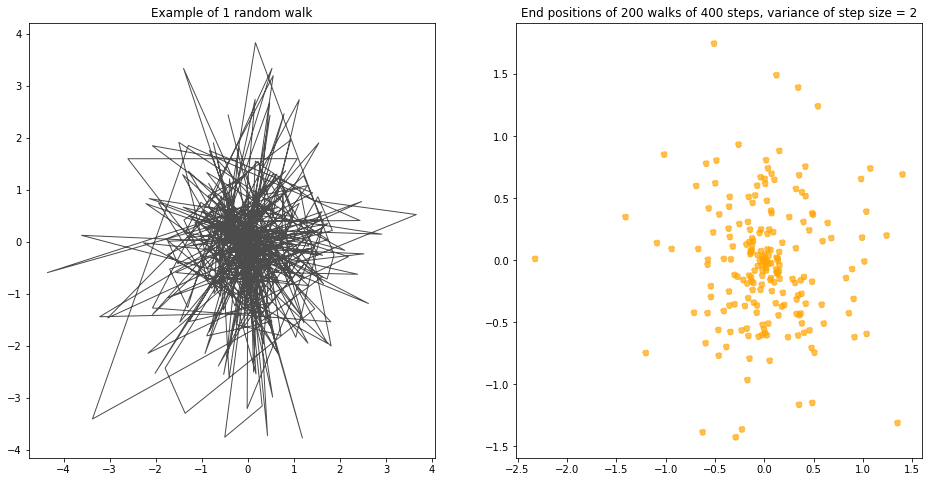

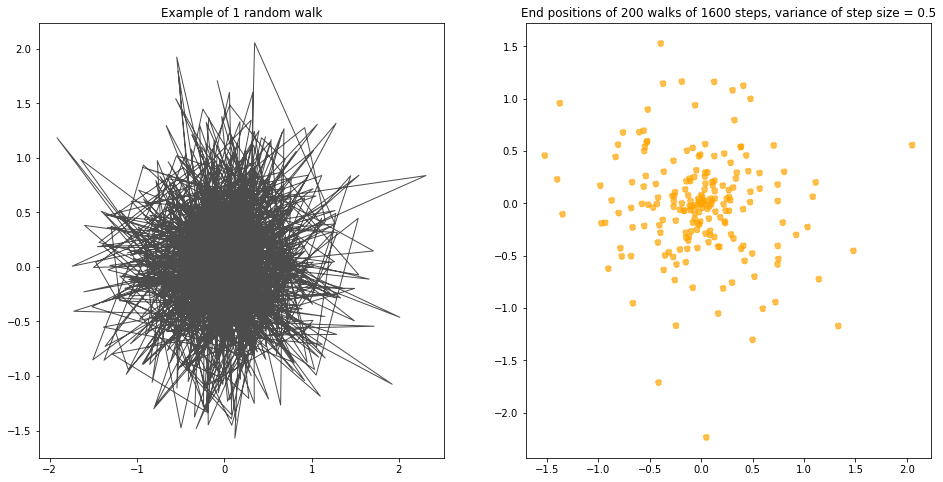

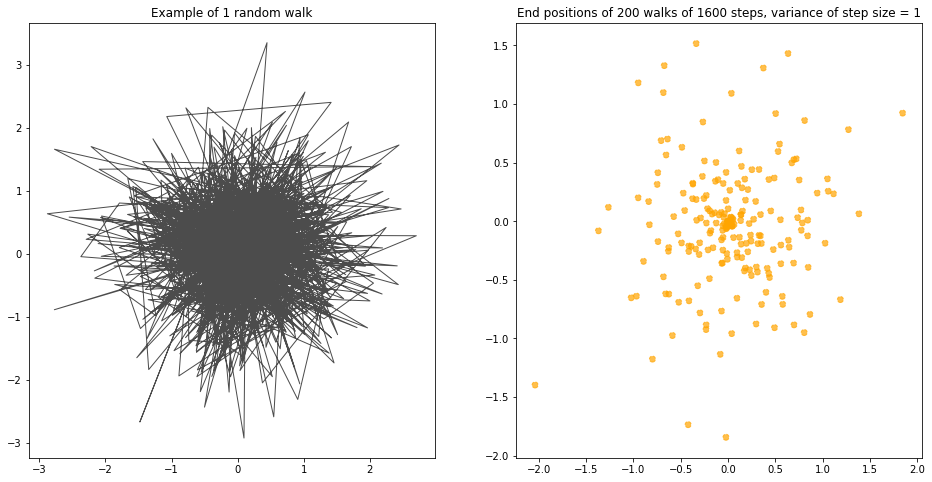

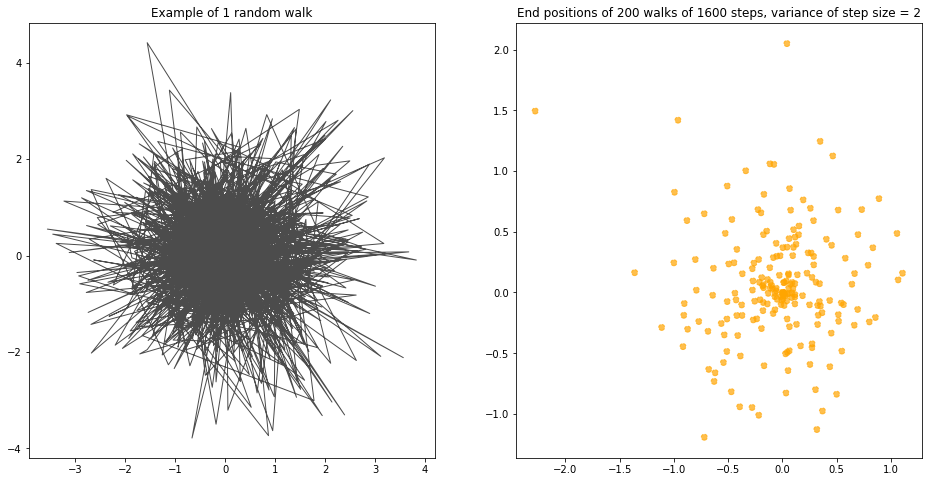

In [65]:
for N in [20,400,1600]:
    for var in [0.5,1,2]:
        generate_results(N,var)

In [96]:
def final_walk(n=100,track_trace = True):
    tracex = []
    tracey = []
    pos = (0,0)
    for i in range(n):
        if track_trace: 
            tracex.append(pos[0])
            tracey.append(pos[1])
        pos = (pos[0]+np.random.randint(-1,2),pos[1]+np.random.randint(-1,2))
        if pos in [(13,7),(13,8),(14,7),(14,8)]:
            return pos, 1, 0,tracex, tracey
        if abs(pos[0]) == 20 or abs(pos[1]) == 20:
            return pos, 0, 1,tracex, tracey
    return pos, 0, 0, tracex, tracey

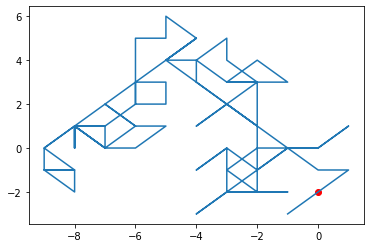

In [98]:
P, _, _, x,y = final_walk()
plt.plot(x,y)
plt.scatter(P[0],P[1],color='red')
plt.show()

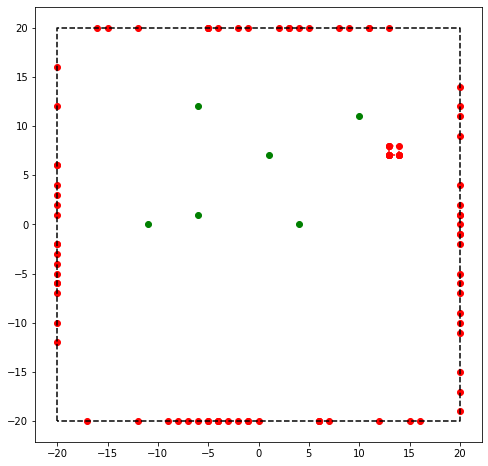

holed = 13, boundaried = 81, absorbed = 94, proportion_abosrbed = 0.94


In [109]:
N = 1000 
n_walks = 100
endposx = []
endposy = []
endposx1 = []
endposy1 = []
holed = 0
boundaried = 0
for i in range(n_walks):
    pos, h, b, _, _ = final_walk(N)
    if h or b:
        endposx1.append(pos[0])
        endposy1.append(pos[1])
    else:
        endposx.append(pos[0])
        endposy.append(pos[1])
    holed+=h
    boundaried+=b
    
plt.figure(figsize=(8,8))
plt.scatter(endposx,endposy, color = 'green')
plt.scatter(endposx1,endposy1, color = 'red')
plt.plot([13,13,14,14,13],[7,8,8,7,7], color = 'red',linestyle = '--')
plt.plot([-20,-20,20,20,-20],[-20,20,20,-20,-20], color ='black',linestyle = '--')
plt.show()
print('number of timesteps per walk = {}'.format(N))
print('holed = {}, boundaried = {}, absorbed = {}, proportion_abosrbed = {}'.format(holed,boundaried,holed+boundaried,(holed+boundaried)/n_walks))


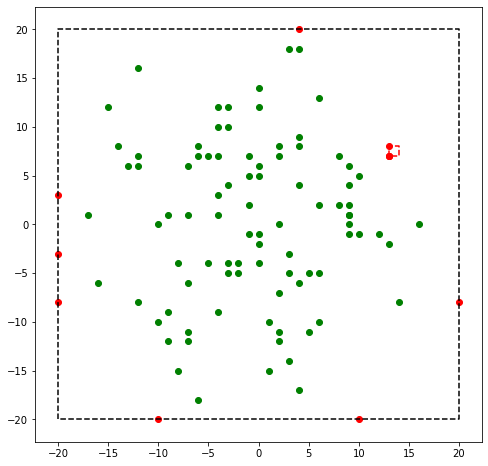

number of timesteps per walk = 100
holed = 4, boundaried = 7, absorbed = 11, proportion_abosrbed = 0.11


In [111]:
N = 100 
n_walks = 100
endposx = []
endposy = []
endposx1 = []
endposy1 = []
holed = 0
boundaried = 0
for i in range(n_walks):
    pos, h, b, _, _ = final_walk(N)
    if h or b:
        endposx1.append(pos[0])
        endposy1.append(pos[1])
    else:
        endposx.append(pos[0])
        endposy.append(pos[1])
    holed+=h
    boundaried+=b
    
plt.figure(figsize=(8,8))
plt.scatter(endposx,endposy, color = 'green')
plt.scatter(endposx1,endposy1, color = 'red')
plt.plot([13,13,14,14,13],[7,8,8,7,7], color = 'red',linestyle = '--')
plt.plot([-20,-20,20,20,-20],[-20,20,20,-20,-20], color ='black',linestyle = '--')
plt.show()
print('number of timesteps per walk = {}'.format(N))

print('holed = {}, boundaried = {}, absorbed = {}, proportion_abosrbed = {}'.format(holed,boundaried,holed+boundaried,(holed+boundaried)/n_walks))
